In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from june.paths import data_path

def AnnotateCM(cm, cm_err, ax, thresh=1e10):
    """
    Function to annotate the CM with text. Including error catching for Nonetype errors.

    Parameters
    ----------
        cm:
            np.array contact matrix
        cm_err:
            np.array contact matrix errors
        ax:
            matplotlib axes
        thresh:
            threshhold value for CM text change colour


    Returns
    -------
        ax
    """
    size=15
    if cm.shape[0] == 3:
        size=12
    if cm.shape[0] > 3:
        size=10

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            fmt = ".2f"
            if cm[i,j] == 1e-16:
                cm[i,j] = 0
            if cm[i,j] > 1e8:
                cm[i,j] = np.inf

            if cm_err is not None:
                if np.isnan(cm_err[i,j]):
                    cm_err[i,j]=0

                if cm_err[i,j] + cm[i,j] == 0:
                    fmt = ".0f"

                text =  r"$ %s \pm %s$" % (format(cm[i, j], fmt), format(cm_err[i, j], fmt))
            else: 
                text =  r"$ %s $" % (format(cm[i, j], fmt))

            if thresh == 1e8:
                ax.text(j, i,text,
                    ha="center", va="center",
                    color="black",size=size)
            else:
                ax.text(j, i,text,
                    ha="center", va="center",
                    color="white" if abs(cm[i, j] - 1) > thresh else "black",size=size)
    return ax

No --data argument given - defaulting to:
/home/joseph/Documents/PhD/UN_Work/JUNE-private/data
No --configs argument given - defaulting to:
/home/joseph/Documents/PhD/UN_Work/JUNE-private/june/configs


# Population sizes

N kids: 13443727
N Young adults: 5949817
N adults: 33411507
N olds: 10377127
N Tot: 63182178, CHECK: 63182178
Nkids per young adults 2.259519410428926
N Tot: 63182178, CHECK: 63182178.0


Text(0, 0.5, 'Population density')

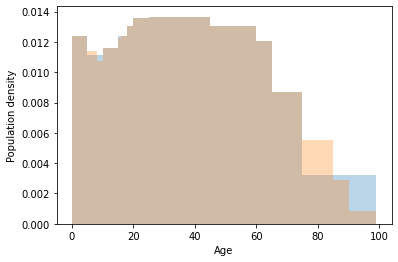

In [2]:
#https://www.nomisweb.co.uk/census/2011/KS102UK/view/2092957697?cols=measures
ONS_census = {
    "0-4" : 3913953,
    "5-7" : 2158947,
    "8-9" : 1357668,
    "10-14" : 3669326,
    "15" : 774892,
    "16-17" : 1568941,
    "18-19" : 1652619,
    "20-24" : 4297198,
    "25-29" : 4306340,
    "30-44" : 12945561,
    "45-59" : 12351632,
    "60-64" : 3807974,
    "65-74" : 5480225,
    "75-84" : 3504915,
    "85-89" : 918343,
    "90-99" : 473644
}

#Get K,Y,A,O
NK = np.sum([ONS_census["0-4"], ONS_census["5-7"], ONS_census["8-9"], ONS_census["10-14"], ONS_census["15"], ONS_census["16-17"] ])
NY = np.sum([ONS_census["18-19"], ONS_census["20-24"]])
NA = np.sum([ONS_census["25-29"], ONS_census["30-44"], ONS_census["45-59"], ONS_census["60-64"]])
NO = np.sum([ONS_census["65-74"], ONS_census["75-84"], ONS_census["85-89"], ONS_census["90-99"]])

print(f"N kids: {NK}")
print(f"N Young adults: {NY}")
print(f"N adults: {NA}")
print(f"N olds: {NO}")
print(f"N Tot: {NK+NY+NA+NO}, CHECK: {np.sum(list(ONS_census.values()))}")

NKA_ratio = NK / NY
print(f"Nkids per young adults {NKA_ratio}")

#Get BBC_Pandemic_binning
BBC_census = {
    "0-4" : ONS_census["0-4"],
    "5-9" : ONS_census["5-7"]+ONS_census["8-9"],
    "10-12" : ONS_census["10-14"]*(((12-10)+1)/((14-10)+1)),
    "13-14" : ONS_census["10-14"]*(((14-13)+1)/((14-10)+1)),
    "15-17" : ONS_census["15"]+ONS_census["16-17"],
    "18-19" : ONS_census["18-19"],
    "20-21" : ONS_census["20-24"]*(((21-20)+1)/((24-20)+1)),
    "22-24" : ONS_census["20-24"]*(((24-22)+1)/((24-20)+1)),
    "25-29" : ONS_census["25-29"],
    "30-34" : ONS_census["30-44"]*(((34-30)+1)/((44-30)+1)),
    "35-39" : ONS_census["30-44"]*(((39-35)+1)/((44-30)+1)),
    "40-44" : ONS_census["30-44"]*(((44-40)+1)/((44-30)+1)),
    "45-49" : ONS_census["45-59"]*(((49-45)+1)/((59-45)+1)),
    "50-54" : ONS_census["45-59"]*(((54-50)+1)/((59-45)+1)),
    "55-59" : ONS_census["45-59"]*(((59-55)+1)/((59-45)+1)),
    "60-64" : ONS_census["60-64"],
    "65-69" : ONS_census["65-74"]*(((69-65)+1)/((74-65)+1)),
    "70-74" : ONS_census["65-74"]*(((74-70)+1)/((74-65)+1)),
    "75-99" : ONS_census["75-84"]+ONS_census["85-89"]+ONS_census["90-99"],
}
print(f"N Tot: {np.sum(list(ONS_census.values()))}, CHECK: {np.sum(list(BBC_census.values()))}")

NA_P = np.sum([BBC_census["25-29"], BBC_census["30-34"], BBC_census["35-39"], BBC_census["35-39"], BBC_census["40-44"]])

def GetBins(LIST):
    bin_edges = []
    for li in LIST:
        bin_edges.append(int(li.split("-")[0]))
    bin_edges.append(int(li.split("-")[1]))
    bin_edges = np.array(bin_edges)
    widths = np.diff(bin_edges)
    bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
    return bin_edges, bin_centers, widths

BBC_bin_edges, BBC_bin_centers, BBC_widths = GetBins(list(BBC_census.keys()))
BBC_census_H = np.array(list(BBC_census.values()))
ONS_bin_edges, ONS_bin_centers, ONS_widths = GetBins(list(ONS_census.keys()))
ONS_census_H = np.array(list(ONS_census.values()))

plt.bar(height = BBC_census_H/(BBC_widths*sum(BBC_census_H)), x = BBC_bin_centers, width=BBC_widths, alpha=0.3)
plt.bar(height = ONS_census_H/(ONS_widths*sum(ONS_census_H)), x = ONS_bin_centers, width=ONS_widths, alpha=0.3)
plt.xlabel("Age")
plt.ylabel("Population density")

# Resize BBC Pandemic CM

In [4]:
default_BBC_Pandemic_loc = data_path / "BBC_Pandemic"
df = pd.read_excel(default_BBC_Pandemic_loc / "BBC reciprocal matrices by type and context.xls", sheet_name ="all_home")
bbc_cm = df.iloc[:,1:].values.T
bbc_labels = df.iloc[:,0].values

bbc_Max = np.nanmax(bbc_cm)
bbc_Min = np.nanmin(bbc_cm)

bbc_cm = np.nan_to_num(bbc_cm, nan=.215) #This value chosen to give desired 0.47 KK contacts.

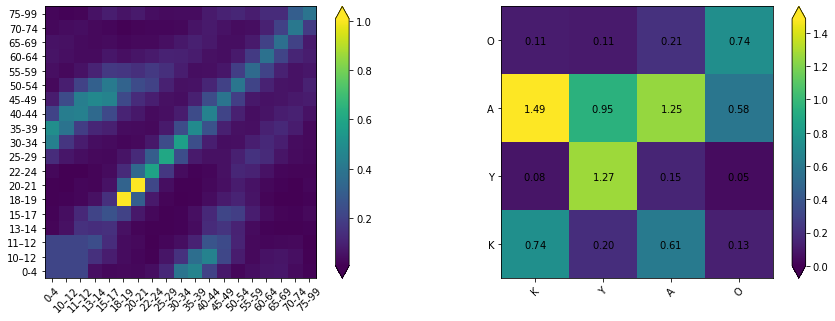

In [5]:
Contracted_labels = ["K","Y","A","O"]
def bin_which(bin_i):
    if 0 <= bin_i < 5:
        return Contracted_labels[0], 0
    elif 5 <= bin_i < 8:
        return Contracted_labels[1], 1
    elif 8 <= bin_i < 16:
        return Contracted_labels[2], 2
    else:
        return Contracted_labels[3], 3
    

BBC_Contracted = np.zeros((4,4))
for bi in range(len(bbc_cm)):
    i_type, Ci = bin_which(bi)
    for bj in range(len(bbc_cm)):
        j_type, Cj = bin_which(bj)
        
        if i_type == Contracted_labels[0]:
            BBC_Contracted[Ci, Cj] += bbc_cm[bi,bj]*BBC_census_H[bi]/NK
        if i_type == Contracted_labels[1]:
            BBC_Contracted[Ci, Cj] += bbc_cm[bi,bj]*BBC_census_H[bi]/NY
        if i_type == Contracted_labels[2]:
            BBC_Contracted[Ci, Cj] += bbc_cm[bi,bj]*BBC_census_H[bi]/NA
        if i_type == Contracted_labels[3]:
            BBC_Contracted[Ci, Cj] += bbc_cm[bi,bj]*BBC_census_H[bi]/NO

plt.rcParams["figure.figsize"] = (15,5)
f, (ax1,ax2) = plt.subplots(1,2)
f.patch.set_facecolor('white')
im1 = ax1.imshow(bbc_cm.T, origin="lower")
ax1.xaxis.tick_bottom()
ax1.set_xticks(np.arange(len(bbc_cm)))
ax1.set_xticklabels(bbc_labels,rotation=45)
ax1.set_yticks(np.arange(len(bbc_cm)))
ax1.set_yticklabels(bbc_labels)

im2 = ax2.imshow(BBC_Contracted.T, origin="lower", vmin=0, vmax=None)
AnnotateCM(BBC_Contracted.T, cm_err=None, ax=ax2, thresh=np.inf)
ax2.xaxis.tick_bottom()
ax2.set_xticks(np.arange(len(BBC_Contracted)))
ax2.set_xticklabels(Contracted_labels,rotation=45)
ax2.set_yticks(np.arange(len(BBC_Contracted)))
ax2.set_yticklabels(Contracted_labels)

f.colorbar(im1, ax=ax1, extend="both")
f.colorbar(im2, ax=ax2, extend="both")

# By Population CM 

In [6]:
BBC_Dict = {}
for b_i in range(len(Contracted_labels)):
    li = Contracted_labels[b_i]
    BBC_Dict[li] = {}
    for b_j in range(len(Contracted_labels)):
        lj = Contracted_labels[b_j]
        BBC_Dict[li][lj] = BBC_Contracted[b_i, b_j]
        

print(BBC_Contracted)
print("")
print(BBC_Dict)

[[0.74143528 0.08341433 1.48515004 0.11486144]
 [0.19708679 1.26540742 0.9482771  0.1090033 ]
 [0.61453296 0.15390246 1.24744156 0.2110017 ]
 [0.13066902 0.05131155 0.58468668 0.73585292]]

{'K': {'K': 0.7414352842124242, 'Y': 0.083414329489808, 'A': 1.4851500369392967, 'O': 0.1148614384937436}, 'Y': {'K': 0.19708678759827042, 'Y': 1.2654074206114556, 'A': 0.9482771048155348, 'O': 0.10900329924463009}, 'A': {'K': 0.6145329553098152, 'Y': 0.1539024594951404, 'A': 1.2474415615086176, 'O': 0.21100170296000434}, 'O': {'K': 0.13066902480322468, 'Y': 0.0513115453695441, 'A': 0.5846866831213573, 'O': 0.7358529200788547}}


# Number of children per family household

In [7]:
#https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/families/adhocs/008855familieswithdependentchildrenbynumberofchildrenuk1996to2017
NFamilys = 7747000
NDependents = {
    1: 3549000,
    2: 3042000,
    3: 853000, 
    4: 220000,
    5: 83000,
}

NDependents_Frac = {}

av_dependents = 0
av_dependents_2p = 0
counter = 1
for NF in NDependents.values():
    NDependents_Frac[counter] =  NF / NFamilys
    av_dependents += counter * NDependents_Frac[counter]
    
    if counter > 1:
        av_dependents_2p += counter * NF / (NFamilys-NDependents[1])
    counter += 1
    
print(f"Average dependents {av_dependents}")
print(f"Average 2+  {av_dependents_2p}")
print(NDependents_Frac)

Average dependents 1.740931973667226
Average 2+  2.3673177703668413
{1: 0.45811281786498, 2: 0.3926681295985543, 3: 0.11010713824706338, 4: 0.02839808958306441, 5: 0.010713824706337938}


# Normalised by Households

In [8]:
#https://www.nomisweb.co.uk/census/2011/KS105UK/view/2092957697?cols=measures

H_ONS = {
    "Total" : 26442096,
    "One person household" : {
        "Total" : 8086989,
        "Aged 65 and over" : 3293898,
        "Other" : 4793091
    },
    "One family household" : {
        "Total" : 16321730,
        "All aged 65 and over" : 2131191,
        "Married or same-sex civil partnership couple" : {
            "Total" : 8785131,
            "No children" : 3252811,
            "Dependent children" : 4017793,
            "All children non-dependent" : 1514527,
        },
        "Cohabiting couple" : {
            "Total" : 2554054,
            "No children" : 1371761,
            "Dependent children" : 1053397,
            "All children non-dependent" : 128896
        },
        "Lone parent" : {
            "Total" : 2851354,
            "Dependent children" : 1905626,
            "All children non-dependent" : 945728  
        }
    },
    "Other household types" : {
        "Total" : 2033377,
        "With dependent children" : 668559,
        "All full-time students" : 155335,
        "All aged 65 and over" : 75044,
        "Other" : 1134439
            
    }   
}

Nround = 3

# Check We can account for N K, Y, A and O

In [9]:
#Check these totals...
Frac_Y = (NY/ (NY+NA))
Frac_A = (NA/ (NY+NA))
Frac_A_P = (NA_P / (NA)) #Fraction of Adults 25 - 49.


YwParents = 0.615
YwParentsP1 = 0
YwParentsP2 = 0

from scipy.stats import binom
for nkids in range(1,list(NDependents_Frac.keys())[-1]+1):
    mean, var = binom.stats(nkids, YwParents)
    
    YwParentsP1 += mean*NDependents_Frac[nkids]
    
for nkids in range(2, list(NDependents_Frac.keys())[-1]+1):
    mean, var = binom.stats(nkids, YwParents)
    YwParentsP2 += mean*(NDependents_Frac[nkids] / (1-NDependents_Frac[1]))
    
print(YwParentsP1, YwParentsP2)

1.070673163805344 1.4559004287756074


In [10]:
AverageCareHomeSize=20
MultiGen=2
NO_Check = \
    H_ONS["One person household"]["Aged 65 and over"] + \
    2*H_ONS["One family household"]["All aged 65 and over"]
print(f"Census O: {NO}, Household O: {NO_Check}, Ratio: {NO_Check / NO}")


Other = 0
NA_Check = \
    Frac_A*2*H_ONS["One family household"]["Married or same-sex civil partnership couple"]["Total"]+\
    Frac_A*2*H_ONS["One family household"]["Cohabiting couple"]["Total"]+\
    Frac_A*H_ONS["One family household"]["Lone parent"]["Total"]
print(f"Census A: {NA}, Household A: {NA_Check}, Ratio: {NA_Check / NA}")

StudentsPerHouse = 4
FractionDependents = 1
NY_Check = \
    StudentsPerHouse*H_ONS["Other household types"]["All full-time students"] + \
    YwParentsP1*H_ONS["One family household"]["Married or same-sex civil partnership couple"]["All children non-dependent"]+\
    YwParentsP1*H_ONS["One family household"]["Cohabiting couple"]["All children non-dependent"]+\
    YwParentsP1*H_ONS["One family household"]["Lone parent"]["All children non-dependent"]+\
    Frac_Y*2*H_ONS["One family household"]["Married or same-sex civil partnership couple"]["Dependent children"]+\
    Frac_Y*2*H_ONS["One family household"]["Cohabiting couple"]["Dependent children"]+\
    Frac_Y*H_ONS["One family household"]["Lone parent"]["Dependent children"]
print(f"Census Y: {NY}, Household Y: {NY_Check}, Ratio: {NY_Check / NY}")

NK_Check = \
    av_dependents*H_ONS["One family household"]["Lone parent"]["Dependent children"]+\
    av_dependents*H_ONS["One family household"]["Cohabiting couple"]["Dependent children"]+\
    av_dependents*H_ONS["One family household"]["Married or same-sex civil partnership couple"]["Dependent children"]

print(f"Census K: {NK}, Household K: {NK_Check}, Ratio: {NK_Check / NK}")

#We use these numbers for our normalisation

Census O: 10377127, Household O: 7556280, Ratio: 0.7281668615985908
Census A: 33411507, Household A: 21670677.341394007, Ratio: 0.6485992188677394
Census Y: 5949817, Household Y: 5214638.610971718, Ratio: 0.8764368065390445
Census K: 13443727, Household K: 12146162.048793081, Ratio: 0.9034817538910959


In [11]:
#OLDS
Num = NO_Check
Dem = \
    2*H_ONS["One family household"]["All aged 65 and over"]
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_OO = (BBC_Dict["O"]["O"])*F
M_OO = round(M_OO, Nround)
print(f"M_OO: {M_OO}")

Dem = 0
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_OA = (BBC_Dict["O"]["A"])*F
M_OA = round(M_OA, Nround)
print(f"M_OA: {M_OA}")

Dem = 0
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_OY = (BBC_Dict["O"]["Y"])*F
M_OY = round(M_OY, Nround)
print(f"M_OY: {M_OY}")

Dem = 0
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_OK = (BBC_Dict["O"]["K"])*F
M_OK = round(M_OK, Nround)
print(f"M_OK: {M_OK}")

M_OO: 1.305
M_OA: inf
M_OY: inf
M_OK: inf


In [12]:
Num = NA_Check

Dem = 0
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_AO = (BBC_Dict["A"]["O"])*F
M_AO = round(M_AO, Nround)
print(f"M_AO: {M_AO}")

Dem = \
    2*H_ONS["One family household"]["Married or same-sex civil partnership couple"]["Total"]+\
    2*H_ONS["One family household"]["Cohabiting couple"]["Total"]
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_AA = (BBC_Dict["A"]["A"])*F
M_AA = round(M_AA, Nround)
print(f"M_AA: {M_AA}")

Dem = \
    Frac_A*2*H_ONS["One family household"]["Married or same-sex civil partnership couple"]["All children non-dependent"]+\
    Frac_A*2*H_ONS["One family household"]["Cohabiting couple"]["All children non-dependent"]+\
    Frac_A*1*H_ONS["One family household"]["Lone parent"]["All children non-dependent"]
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_AY = BBC_Dict["A"]["Y"]*F
M_AY = round(M_AY, Nround)
print(f"M_AY: {M_AY}")

Dem = \
    Frac_A*2*H_ONS["One family household"]["Married or same-sex civil partnership couple"]["Dependent children"]+\
    Frac_A*2*H_ONS["One family household"]["Cohabiting couple"]["Dependent children"]+\
    Frac_A*(H_ONS["One family household"]["Lone parent"]["Dependent children"])
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_AK = (BBC_Dict["A"]["K"])*F
M_AK = round(M_AK, Nround)
print(f"M_AK: {M_AK}")

M_AO: inf
M_AA: 1.192
M_AY: 0.928
M_AK: 1.302


In [13]:
Num = NY_Check

Dem = 0
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_YO = (BBC_Dict["Y"]["O"])*F
M_YO = round(M_YO, Nround)
print(f"M_YO: {M_YO}")

#Not all the dependents will be Young adults
Dem = \
    YwParentsP2*H_ONS["One family household"]["Married or same-sex civil partnership couple"]["All children non-dependent"]+\
    YwParentsP2*H_ONS["One family household"]["Cohabiting couple"]["All children non-dependent"]+\
    YwParentsP2*H_ONS["One family household"]["Lone parent"]["All children non-dependent"]
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_YA = (BBC_Dict["Y"]["A"])*F

#M_YA = (1/3)*((0.87/0.75)+(0.65/0.5)+(0.55/0.4))
M_YA = round(M_YA, Nround)
print(f"M_YA: {M_YA}")

#M_YY = M_AA
Dem = \
    (StudentsPerHouse)*H_ONS["Other household types"]["All full-time students"] + \
    (1-NDependents_Frac[1])*(YwParentsP2)*H_ONS["One family household"]["Married or same-sex civil partnership couple"]["All children non-dependent"]+\
    (1-NDependents_Frac[1])*(YwParentsP2)*H_ONS["One family household"]["Cohabiting couple"]["All children non-dependent"]+\
    (1-NDependents_Frac[1])*(YwParentsP2)*H_ONS["One family household"]["Lone parent"]["All children non-dependent"]
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_YY = (BBC_Dict["Y"]["Y"])*F
M_YY = round(M_YY, Nround)
print(f"M_YY: {M_YY}")

Dem = \
    Frac_Y*2*H_ONS["One family household"]["Married or same-sex civil partnership couple"]["Dependent children"]+\
    Frac_Y*2*H_ONS["One family household"]["Cohabiting couple"]["Dependent children"]+\
    Frac_Y*H_ONS["One family household"]["Lone parent"]["Dependent children"]
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_YK = (BBC_Dict["Y"]["K"])*F
M_YK = round(M_YK, Nround)
print(f"M_YK: {M_YK}")

M_YO: inf
M_YA: 1.312
M_YY: 2.477
M_YK: 0.564


In [14]:
Num = NK_Check

Dem = 0
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_KO = (BBC_Dict["K"]["O"])*F
M_KO = round(M_KO, Nround)
print(f"M_KO: {M_KO}")

Dem = \
    av_dependents*H_ONS["One family household"]["Lone parent"]["Dependent children"]+\
    av_dependents*H_ONS["One family household"]["Cohabiting couple"]["Dependent children"]+\
    av_dependents*H_ONS["One family household"]["Married or same-sex civil partnership couple"]["Dependent children"]
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_KA = (BBC_Dict["K"]["A"])#*F
M_KA = round(M_KA, Nround)
print(f"M_KA: {M_KA}")

Dem = \
    (av_dependents-1)*Frac_Y*H_ONS["One family household"]["Lone parent"]["Dependent children"]+\
    (av_dependents-1)*Frac_Y*H_ONS["One family household"]["Cohabiting couple"]["Dependent children"]+\
    (av_dependents-1)*Frac_Y*H_ONS["One family household"]["Married or same-sex civil partnership couple"]["Dependent children"]

if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_KY = (BBC_Dict["K"]["Y"])*F
M_KY = round(M_KY, Nround)
print(f"M_KY: {M_KY}")

Dem = \
    (1-NDependents_Frac[1])*av_dependents*H_ONS["One family household"]["Lone parent"]["Dependent children"]+\
    (1-NDependents_Frac[1])*av_dependents*H_ONS["One family household"]["Cohabiting couple"]["Dependent children"]+\
    (1-NDependents_Frac[1])*av_dependents*H_ONS["One family household"]["Married or same-sex civil partnership couple"]["Dependent children"]
if Dem != 0:
    F = Num/Dem
else:
    F = np.inf
M_KK = (BBC_Dict["K"]["K"])*F
M_KK = round(M_KK, Nround)
print(f"M_KK: {M_KK}")

M_KO: inf
M_KA: 1.485
M_KY: 1.297
M_KK: 1.368


In [15]:
M_AO = M_AA
M_OA = M_AA

M_OA = M_AA
M_OY = M_AY
M_OK = M_AK

M_YO = M_YA
M_KO = M_KA
M_YK = M_AK

In [16]:
M = [
    [M_KK, M_KY, M_KA, M_KO],
    [M_YK, M_YY, M_YA, M_YO],
    [M_AK, M_AY, M_AA, M_AO],
    [M_OK, M_OY, M_OA, M_OO]
]
print(M)
M = np.array(M)

[[1.368, 1.297, 1.485, 1.485], [1.302, 2.477, 1.312, 1.312], [1.302, 0.928, 1.192, 1.192], [1.302, 0.928, 1.192, 1.305]]


In [17]:
MOld = [[1.2,1.27,1.27,1.27],[1.69,1.34,1.3,1.3],[1.69,1.47,1.34,1.34],[1.69,1.47,1.34,2.00]]
print(MOld)
MOld = np.array(MOld)

[[1.2, 1.27, 1.27, 1.27], [1.69, 1.34, 1.3, 1.3], [1.69, 1.47, 1.34, 1.34], [1.69, 1.47, 1.34, 2.0]]


In [18]:
print(M / MOld)

[[1.14       1.02125984 1.16929134 1.16929134]
 [0.7704142  1.84850746 1.00923077 1.00923077]
 [0.7704142  0.63129252 0.88955224 0.88955224]
 [0.7704142  0.63129252 0.88955224 0.6525    ]]


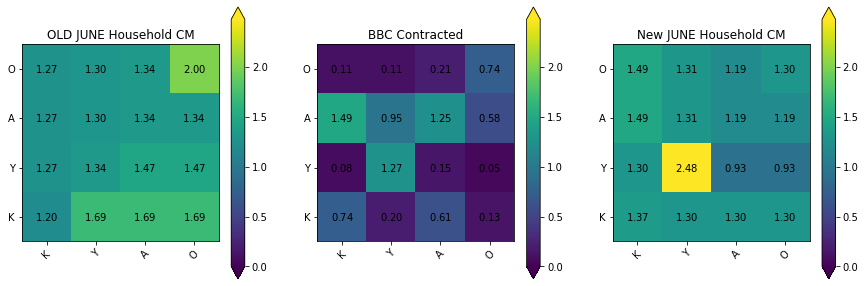

In [19]:
M = np.nan_to_num(M, posinf=0)
vmin = 0
vmax = max(np.nanmax(M), np.nanmax(MOld))

plt.rcParams["figure.figsize"] = (15,5)
f, (ax1,ax2, ax3) = plt.subplots(1,3)
f.patch.set_facecolor('white')
im1 = ax1.imshow(MOld.T, origin="lower", vmin =vmin, vmax=vmax)
AnnotateCM(MOld.T, cm_err=None, ax=ax1, thresh=np.inf)
ax1.xaxis.tick_bottom()
ax1.set_xticks(np.arange(len(BBC_Contracted)))
ax1.set_xticklabels(Contracted_labels,rotation=45)
ax1.set_yticks(np.arange(len(BBC_Contracted)))
ax1.set_yticklabels(Contracted_labels)
ax1.set_title("OLD JUNE Household CM")

im2 = ax2.imshow(BBC_Contracted.T, origin="lower", vmin =vmin, vmax=vmax)
AnnotateCM(BBC_Contracted.T, cm_err=None, ax=ax2, thresh=np.inf)
ax2.xaxis.tick_bottom()
ax2.set_xticks(np.arange(len(BBC_Contracted)))
ax2.set_xticklabels(Contracted_labels,rotation=45)
ax2.set_yticks(np.arange(len(BBC_Contracted)))
ax2.set_yticklabels(Contracted_labels)
ax2.set_title("BBC Contracted")

im3 = ax3.imshow(M.T, origin="lower", vmin =vmin, vmax=vmax)
AnnotateCM(M.T, cm_err=None, ax=ax3, thresh=np.inf)
ax3.xaxis.tick_bottom()
ax3.set_xticks(np.arange(len(BBC_Contracted)))
ax3.set_xticklabels(Contracted_labels,rotation=45)
ax3.set_yticks(np.arange(len(BBC_Contracted)))
ax3.set_yticklabels(Contracted_labels)
ax3.set_title("New JUNE Household CM")

f.colorbar(im1, ax=ax1, extend="both")
f.colorbar(im2, ax=ax2, extend="both")
f.colorbar(im3, ax=ax3, extend="both")
plt.savefig("/home/joseph/Desktop/Householdmatrix.jpg")

# # Messabout with Adult / Child probability


{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0.057324175898868734, 14: 0.1978161114414182, 15: 0.5, 16: 0.8021838885585818, 17: 0.9426758241011313, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1}


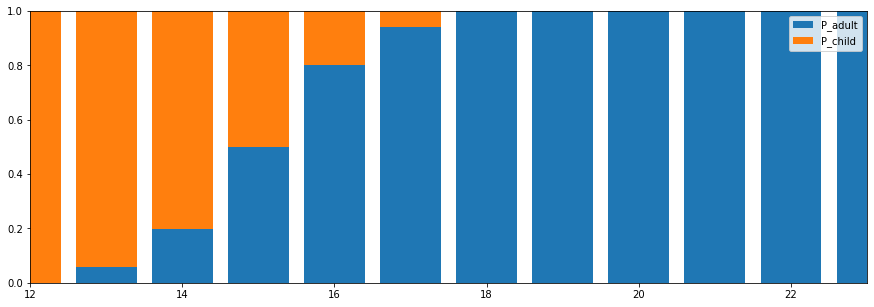

In [20]:
from scipy import stats

def P_IsAdult(age):
    tanh_halfpeak_age = 15#17.1
    tanh_width = .7#1
    
    minageadult = 13
    maxagechild = 17
    if age < minageadult:
        return 0
    elif age > maxagechild:
        return 1
    else:
        return (np.tanh(tanh_width*(age-tanh_halfpeak_age))+1)/2
    
def P_IsChild(age):
    return 1 - P_IsAdult(age)

def AorC(age):
    r = np.random.rand(1)[0]
    if r < P_IsAdult(age):
        return "Adult"
    else:
        return "Child"
    

xs = np.arange(0,25,1)


plt.bar(xs, [P_IsAdult(xi) for xi in xs], label="P_adult")
plt.bar(xs, [P_IsChild(xi) for xi in xs], bottom=[P_IsAdult(xi) for xi in xs], label="P_child")
plt.legend()

plt.xlim([12, 23])

adultchild_distribution = dict(zip(xs,  [P_IsAdult(xi) for xi in xs] ))
print(adultchild_distribution)



# adultchild_distribution = {
#     14: 0.07,
#     15: 0.11,
#     16: 0.15,
#     17: 0.18,
#     18: 0.16,
#     19: 0.13,
#     20: 0.08,
#     21: 0.07,
#     22: 0.03,
# }
# self.household_size_generator = stats.rv_discrete(
#     values=[
#         list(adultchild_distribution.keys()),
#         list(adultchild_distribution.values()),
#     ]
# )